In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics, linear_model
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.linear_model import LogisticRegression, RidgeCV, LassoCV

/usr/local/lib/python2.7/dist-packages/sklearn/lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/qda.py:6: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


In [4]:
df_total = pd.read_csv("./leo_kaggle/data.csv")
df_total

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7
7,Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,8
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9
9,Running Jump Shot,Jump Shot,294,20000012,33.9193,-33,125,-118.3028,3,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,10


In [210]:
df_total["months"] = df_total["game_date"].apply(lambda x:x.split('-')[1])
df_total["years"] = df_total["game_date"].apply(lambda x:x.split('-')[0])
df_trans = df_total[df_total["shot_made_flag"] * 1 == df_total["shot_made_flag"]]
# We take only a tenth of the set to play with to have a better speed

df = df_trans.iloc[:len(df_trans) /2]

df_test = df_total[df_total["shot_made_flag"] * 1 != df_total["shot_made_flag"]]
print(len(df))
df

12848


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,months,years
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,10,2000
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,10,2000
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,10,2000
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,10,2000
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6,10,2000
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7,10,2000
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9,10,2000
9,Running Jump Shot,Jump Shot,294,20000012,33.9193,-33,125,-118.3028,3,3,...,In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,10,10,2000
10,Jump Shot,Jump Shot,309,20000012,33.8063,-94,238,-118.3638,1,3,...,Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,11,10,2000
11,Jump Shot,Jump Shot,4,20000019,33.9173,121,127,-118.1488,11,1,...,Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,12,11,2000


# We need to standardize our database

In [6]:
from sklearn import preprocessing


In [7]:
def cartesian_to_polar(df, name_x, name_y):
    df["loc_r"]=df.apply(lambda row:np.sqrt(row[name_x]**2 + row[name_y]**2), axis =1)
    df["loc_teta"]= df.apply(lambda row:np.arccos(row[name_x] / row["loc_r"]) if row["loc_r"] else 0, axis=1)

def drop_and_binarize(df, to_binarize, to_drop):
    new_df = df.copy()
    to_binarize =[feature for feature in to_binarize if feature not in to_drop]
    print(len(new_df.columns))
    new_df.drop(to_drop, axis=1, inplace=True)
    print(len(new_df.columns))
    lb = preprocessing.LabelBinarizer()
    for feature in to_binarize:
        lb.fit(df[feature])
        new_df[feature]=df[feature].apply(lambda x:lb.transform([x]).flatten())
    return new_df




In [8]:
def aux_df_to_array(ar):
    l = list()
    for elem in ar:
            if type(elem) is numpy.ndarray:
                l.extend(elem)
            else:
                l.append(elem)
    return np.array(l)

def df_to_array(df):
    return np.apply_along_axis(aux_df_to_array, 1, df.values)

In [9]:
def rescale(vect_train, min_max):
    res = preprocessing.MinMaxScaler(min_max)
    return res.fit_transform(vect_train)

def standardize(vect_train):
    sta = preprocessing.StandardScaler()
    return sta.fit_transform(vect_train)

In [211]:
cartesian_to_polar(df, "loc_x", "loc_y")

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
features_to_binarize = ["action_type", "combined_shot_type", "shot_type", "shot_zone_area", "shot_zone_basic", "shot_zone_range", "team_name", "matchup", "opponent", "months"]
features_to_drop = ["playoffs", "team_id", "team_name", "opponent", "lat", "lon", "season", "shot_zone_area", "shot_zone_basic", "shot_zone_range", "shot_distance"]

In [212]:
new_df = drop_and_binarize(df, features_to_binarize, features_to_drop)

29
18


In [213]:
new_df = new_df.reset_index()

# First try : brutal classification


In [20]:
clf = SVC(probability=True)



        
        
vect_train = df_to_array(new_df[["action_type"]])   
#vect_train = standardize(vect_train)
vect_train = rescale(vect_train, (0,1))

#np.apply_along_axis(lambda x:np.array([1,2,3]), 1, new_df)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [14]:
vect_train.shape

(5139, 88)

In [262]:
from sklearn.model_selection import GridSearchCV
clf = SVC()
param_grid = { 'kernel':["linear", "poly", "rbf", "sigmoid"]}
clf_grid_search = GridSearchCV(clf, param_grid)

In [265]:
clf_grid_search.fit(vect_train, new_df["shot_made_flag"])

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [21]:

scores = cross_val_score(clf, vect_train, new_df["shot_made_flag"], scoring="neg_log_loss")
print(scores)
print(- np.mean(scores), np.std(scores))

[-0.62373572 -0.613132   -0.61637454]
(0.61774741872682759, 0.0044364625499960283)


AttributeError: 'function' object has no attribute 'predict_proba'

# Let's see how some features correlate with win frequence

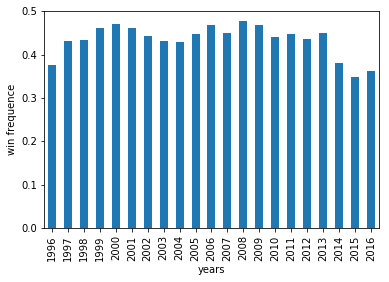

In [5]:
win_frequence_per_year = df.groupby('years')["shot_made_flag"].sum() / df.groupby('years')["shot_made_flag"].count()
plt.ylabel("win frequence")
win_frequence_per_year.plot.bar()

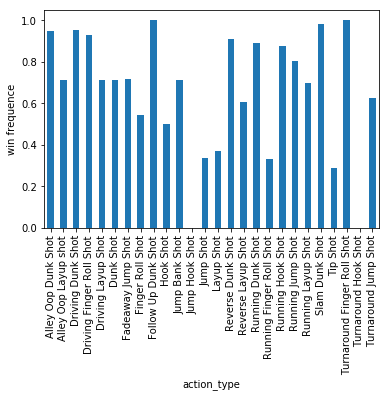

In [62]:
win_frequence_per_year = df.groupby('action_type')["shot_made_flag"].sum() / df.groupby('action_type')["shot_made_flag"].count()
plt.ylabel("win frequence")
win_frequence_per_year.plot.bar()


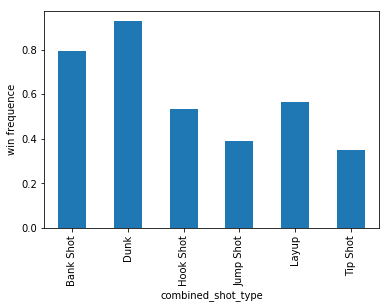

In [7]:
win_frequence_per_year = df.groupby('combined_shot_type')["shot_made_flag"].sum() / df.groupby('combined_shot_type')["shot_made_flag"].count()
plt.ylabel("win frequence")
win_frequence_per_year.plot.bar()

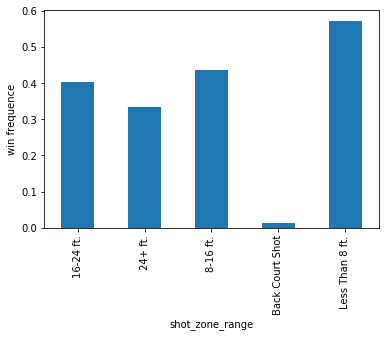

In [8]:
win_frequence_per_year = df.groupby('shot_zone_range')["shot_made_flag"].sum() / df.groupby('shot_zone_range')["shot_made_flag"].count()
plt.ylabel("win frequence")
win_frequence_per_year.plot.bar()

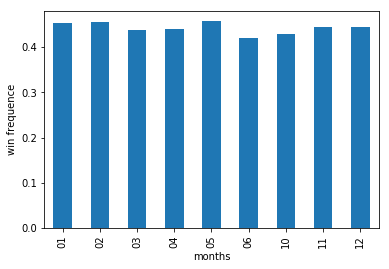

In [9]:
win_frequence_per_year = df.groupby('months')["shot_made_flag"].sum() / df.groupby('months')["shot_made_flag"].count()
plt.ylabel("win frequence")
win_frequence_per_year.plot.bar()

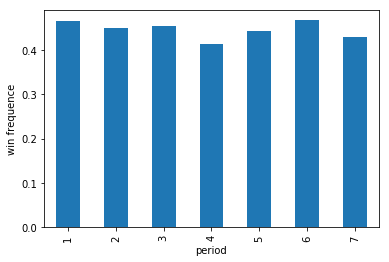

In [7]:
win_frequence_per_year = df.groupby('period')["shot_made_flag"].sum() / df.groupby('period')["shot_made_flag"].count()
plt.ylabel("win frequence")
win_frequence_per_year.plot.bar()

# Plot of Kobe Briant's shot on the field

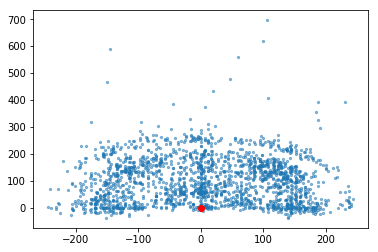

In [5]:
x_min, x_max = np.min(df["loc_x"]), np.max(df["loc_x"])
y_min, y_max = np.min(df["loc_y"]), np.max(df["loc_y"])
x = df["loc_x"].values
y = df["loc_y"].values
plt.scatter(x, y, alpha=0.5, s=5)
plt.plot(0, 0, 'ro')

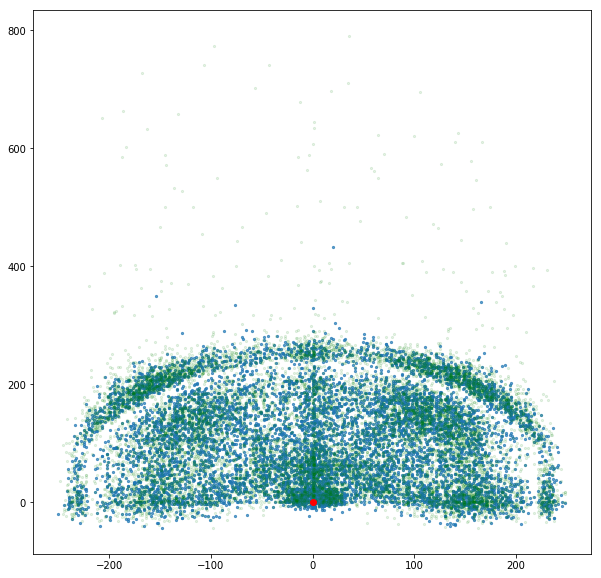

In [18]:
plt.figure(figsize=(10,10))
x = df[df['shot_made_flag']==1]["loc_x"].values
y = df[df['shot_made_flag']==1]["loc_y"].values
x_miss = df[df['shot_made_flag']==0]["loc_x"].values
y_miss = df[df['shot_made_flag']==0]["loc_y"].values
plt.scatter(x, y, alpha=0.7, s=5)
plt.scatter(x_miss, y_miss, alpha=0.1, s=5, c="g")
plt.plot(0, 0, 'ro')

In [21]:
from sklearn.neighbors import KernelDensity
kde1 = KernelDensity(bandwidth = 10)
kde2 = KernelDensity(bandwidth = 10)
x = df["loc_x"].values
y = df["loc_y"].values
xy = np.column_stack((x, y))
kde1.fit(xy)
x = df[df['shot_made_flag']==1]["loc_x"].values
y = df[df['shot_made_flag']==1]["loc_y"].values
xy = np.column_stack((x, y))
kde2.fit(xy)

KernelDensity(algorithm='auto', atol=0, bandwidth=10, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [22]:
pts_x = np.random.uniform(x_min, x_max, 10000)
pts_y = np.random.uniform(y_min, y_max, 10000)
pts = np.column_stack((pts_x, pts_y))
z= np.exp(kde2.score_samples(pts) - kde1.score_samples(pts))

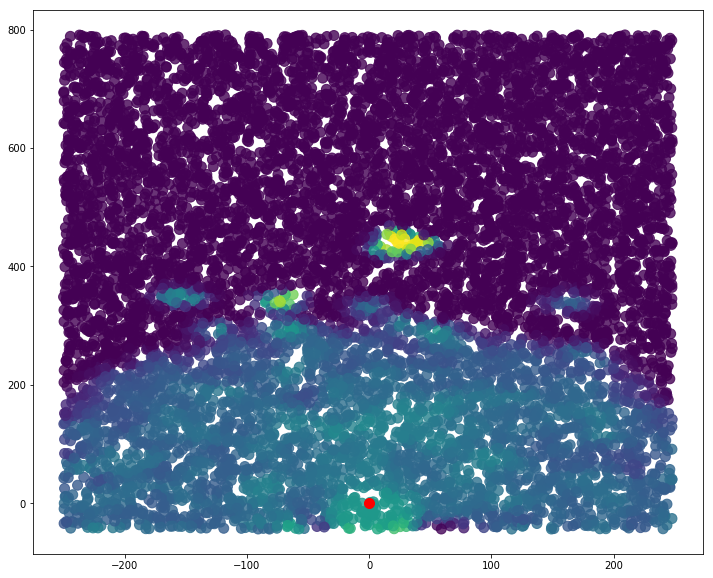

In [23]:
plt.figure(figsize=(12, 10))
plt.scatter(pts_x, pts_y, c=z, alpha = 0.8, s=100)
plt.scatter(0, 0, c='r', s=100)

In [ ]:
print(z)

# Let's see if Kobe can be "on fire"

In [228]:
def n_shots_before(shot):
    game_id = shot["game_id"]
    shots = df[df["game_id"] == game_id]
    mask = (shots["minutes_remaining"] == shot["minutes_remaining"]) & (shots["seconds_remaining"] > shot["seconds_remaining"]) | (shots["minutes_remaining"] > shot["minutes_remaining"])
    if shot["shot_id"]%100 ==0:
        print(shot["shot_id"])
    return shots[mask]["shot_made_flag"].count(), shots[mask]["shot_made_flag"].sum()

def n_successive_shots(shot):
    game_id = shot["game_id"]
    shots = df[df["game_id"] == game_id]
    shots = shots.sort_values(by=["minutes_remaining", "seconds_remaining"], ascending=False).reset_index()
    #On trouve l'index de shot
    index = 0
    for i, a in enumerate(shots["shot_id"]==shot["shot_id"]):
        if a:
            index = i
    result = 0
    for i in range(index - 1, -1, -1):
        if not shots.iloc[i]["shot_made_flag"] :
            print(index, i)
            result = index - i -1
            break
        elif not i :
            result = index
    return result

def add_on_fire_features(df):
    col = df.apply(n_shots_before, axis =1)
    col2 = df.apply(n_successive_shots, axis =1)
    new_df["n_successive_shots"] = col2.reset_index(drop=True)
    new_df["n_shots_tried_before"]=col.apply(lambda x:x[0]).reset_index(drop=True)
    new_df["n_shots_made_before"]=col.apply(lambda x:x[1]).reset_index(drop=True)
    new_df["previous_win_frequency"]=col.apply(lambda x: (x[1] / x[0]) if x[0]>0 else 0 ).reset_index(drop=True)
    
print(df.iloc[1622]["shot_id"])
print(n_successive_shots(df.iloc[1622]))

1926
2


In [ ]:
add_on_fire_features(new_df)

                        game_event_id       game_id          lat  loc_x  \
previous_win_frequency                                                    
(0.0, 0.1]                      19689    1657242483    2445.7206   1702   
(0.1, 0.2]                     230843   22350363362   31240.9710  11825   
(0.2, 0.3]                     536616   49890311810   70056.7219  14656   
(0.3, 0.4]                    1171231  110295525076  151863.7489  30897   
(0.4, 0.5]                    1752660  166901103820  227486.1370  39000   
(0.5, 0.6]                     905026   82462087786  114036.6787  19512   
(0.6, 0.7]                     564188   54463862890   74689.1460  13709   
(0.7, 0.8]                     273110   26879066464   36841.0615   7057   
(0.8, 0.9]                      52479    5177219283    7228.7029   1903   
(0.9, 1.0]                     240534   30744356909   41762.0890  17267   

                         loc_y          lon  minutes_remaining  period  \
previous_win_frequency   

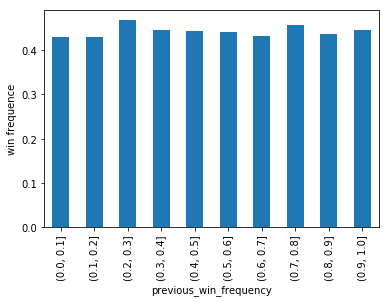

In [79]:
groups_frq = df.groupby(pd.cut(df["previous_win_frequency"], np.arange(0, 1.1, 0.1)))
win_frequence_per_year = groups_frq["shot_made_flag"].sum() / groups_frq["shot_made_flag"].count()
print(groups_frq.sum())
print(groups_frq.count())
plt.ylabel("win frequence")
win_frequence_per_year.plot.bar()

n_successive_shots
0     14771
1      6294
2      2721
3      1123
4       471
5       183
6        78
7        37
8        10
9         4
10        4
11        1
Name: shot_made_flag, dtype: int64


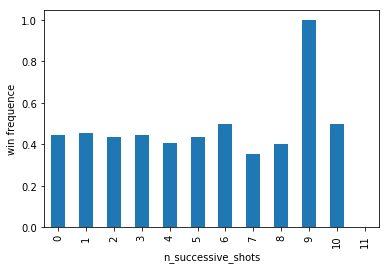

In [80]:
win_frequence_per_year = df.groupby('n_successive_shots')["shot_made_flag"].sum() / df.groupby('n_successive_shots')["shot_made_flag"].count()
print(df.groupby('n_successive_shots')["shot_made_flag"].count())
plt.ylabel("win frequence")
win_frequence_per_year.plot.bar()

n_shots_made_before
0.0     3382
1.0     3256
2.0     3100
3.0     2917
4.0     2834
5.0     2455
6.0     2057
7.0     1623
8.0     1327
9.0      936
10.0     662
11.0     427
12.0     297
13.0     166
14.0     112
15.0      67
16.0      36
17.0      18
18.0      14
19.0       8
20.0       1
21.0       1
22.0       1
Name: shot_made_flag, dtype: int64


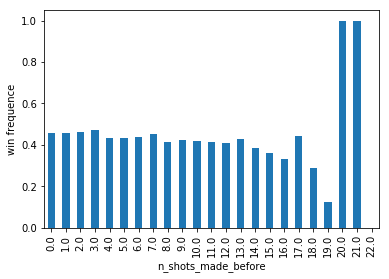

In [83]:
win_frequence_per_year = df.groupby('n_shots_made_before')["shot_made_flag"].sum() / df.groupby('n_shots_made_before')["shot_made_flag"].count()
print(df.groupby('n_shots_made_before')["shot_made_flag"].count())
plt.ylabel("win frequence")
win_frequence_per_year.plot.bar()

n_successive_shots
0     2728
1     1075
2      425
3      183
4       73
5       24
6       16
7        6
8        1
10       1
Name: shot_made_flag, dtype: int64


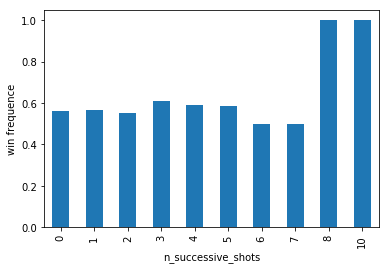

In [119]:
new_df = df[df["combined_shot_type"]=='Layup']
win_frequence = new_df.groupby('n_successive_shots')["shot_made_flag"].sum() / new_df.groupby('n_successive_shots')["shot_made_flag"].count()
print(new_df.groupby('n_successive_shots')["shot_made_flag"].count())
plt.ylabel("win frequence")
win_frequence.plot.bar()

                        game_event_id      game_id         lat  loc_x   loc_y  \
previous_win_frequency                                                          
(0.0, 0.1]                       3969    338608122    475.1822   1665    1438   
(0.1, 0.2]                      60126   5758418493   8140.6800   5658   29952   
(0.2, 0.3]                     129239  12386064061  17399.8669   5425   64859   
(0.3, 0.4]                     278751  27440365735  38165.9155  20670  133922   
(0.4, 0.5]                     447490  42635826469  58922.0611  23030  212888   
(0.5, 0.6]                     224796  20890280002  29480.2937   6454  104203   
(0.6, 0.7]                     145095  14202603448  19643.4677   8828   68182   
(0.7, 0.8]                      70977   7343852825  10075.0821   2934   36075   
(0.8, 0.9]                      20131   1778338097   2510.4582    369    8820   
(0.9, 1.0]                      72227   9649404453  13194.9657   9914   48267   

                           

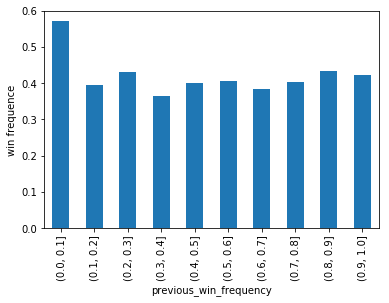

In [100]:
groups_frq = new_df.groupby(pd.cut(new_df["previous_win_frequency"], np.arange(0, 1.1, 0.1)))
win_frequence_per_year = groups_frq["shot_made_flag"].sum() / groups_frq["shot_made_flag"].count()
print(groups_frq.sum())
print(groups_frq.count())
plt.ylabel("win frequence")
win_frequence_per_year.plot.bar()

            game_event_id       game_id          lat    loc_x     loc_y  \
loc_r                                                                     
(0, 50]          474896.0  4.663226e+10   65710.5063   2095.0   29037.0   
(50, 100]        660758.0  6.867947e+10   91752.8017  11705.0  132764.0   
(100, 150]       836522.0  8.806581e+10  119374.4329  32303.0  223193.0   
(150, 200]      1348497.0  1.390167e+11  193066.5734  83987.0  577405.0   
(200, 250]      1020534.0  9.780623e+10  135422.5165  56487.0  584462.0   
(250, 300]       963825.0  8.205856e+10  113970.9977  -2052.0  724249.0   
(300, 350]        18497.0  1.564530e+09    1991.8967  -1142.0   16717.0   
(350, 400]         9053.0  8.423181e+08    1145.7522   -316.0   11754.0   
(400, 450]         8159.0  6.915183e+08     975.7927    404.0   11492.0   
(450, 500]         2221.0  2.848053e+08     403.0816    791.0    5450.0   
(500, 550]         1734.0  2.433046e+08     301.8567      9.0    4542.0   
(550, 600]         2970.0

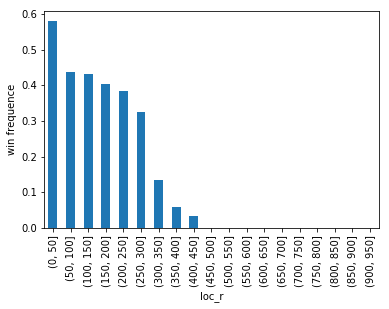

In [296]:
groups_frq = df.groupby(pd.cut(df["loc_r"], np.arange(0, 1000, 50)))
win_frequence_per_year = groups_frq["shot_made_flag"].sum() / groups_frq["shot_made_flag"].count()
print(groups_frq.sum())
print(groups_frq.count())
plt.ylabel("win frequence")
win_frequence_per_year.plot.bar()

            action_type  combined_shot_type  game_event_id  game_id   lat  \
loc_teta                                                                    
(0.0, 0.3]         2304                2304           2304     2304  2304   
(0.3, 0.6]         1467                1467           1467     1467  1467   
(0.6, 0.9]         2460                2460           2460     2460  2460   
(0.9, 1.2]         2791                2791           2791     2791  2791   
(1.2, 1.5]         1642                1642           1642     1642  1642   
(1.5, 1.8]         2130                2130           2130     2130  2130   
(1.8, 2.1]         1751                1751           1751     1751  1751   
(2.1, 2.4]         2546                2546           2546     2546  2546   
(2.4, 2.7]         1685                1685           1685     1685  1685   
(2.7, 3.0]         1258                1258           1258     1258  1258   

            loc_x  loc_y   lon  minutes_remaining  period    ...     team_i

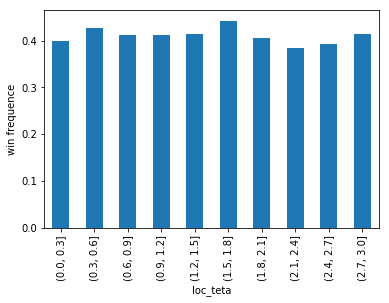

In [304]:
groups_frq = df.groupby(pd.cut(df["loc_teta"], np.arange(0, np.pi , 0.3)))
win_frequence_per_year = groups_frq["shot_made_flag"].sum() / groups_frq["shot_made_flag"].count()
print(groups_frq.count())
plt.ylabel("win frequence")
win_frequence_per_year.plot.bar()

# Let's create our classifier

In [193]:
from sklearn.neighbors import KernelDensity

class PersoClassifier(SVC):
    def __init__(self, bandwidth = 10):
        print("init")
        self.clf = SVC(probability = True)
        self.kde1 = KernelDensity(bandwidth = 10)
        self.kde2 = KernelDensity(bandwidth = 10)
        print(self.clf)
    def fit(self, X, ans):
        loc_x = X[:, 0]
        loc_y = X[:, 1]
        locxy = np.column_stack((loc_x, loc_y))
        self.kde1.fit(locxy)
        locxy_ans = np.column_stack((locxy, ans))
        self.kde2.fit(np.array([a[:-1] for a in locxy_ans if a[-1]]))
        z = np.exp(self.kde2.score_samples(locxy) - self.kde1.score_samples(locxy))
        ans = ans.values
        #z.reshape(len(z), 1)
        #print(z.shape)
        #np.column_stack((locxy, z))
        z = z.reshape(-1, 1)
        ans = ans.reshape(-1, 1)
        np.column_stack((X, z))
        self.clf.fit(X[:, 2:], ans)
    def predict_proba(self, X, other_classifier=True):
        print("predict")
        loc_x = X[:, 0]
        loc_y = X[:, 1]
        locxy = np.column_stack((loc_x, loc_y))
        z = np.exp(self.kde2.score_samples(locxy) - self.kde1.score_samples(locxy)).reshape(-1, 1)
        if not other_classifier:
            return z
        else:
            np.column_stack((X, z))
            return self.clf.predict_proba(X[:, 2:])
            
    def show(self, locxy):
        x_min, x_max = np.min(locxy[:, 0]), np.max(locxy[:, 0])
        y_min, y_max = np.min(locxy[:, 1]), np.max(locxy[:, 1])
        pts_x = np.random.uniform(x_min, x_max, 10000)
        pts_y = np.random.uniform(y_min, y_max, 10000)
        pts = np.column_stack((pts_x, pts_y))
        z= np.exp(self.kde2.score_samples(pts) - self.kde1.score_samples(pts))
        plt.figure(figsize=(12, 10))
        plt.scatter(pts_x, pts_y, c=z, alpha = 0.8, s=100)
        plt.scatter(0, 0, c='r', s=100)

In [222]:
from sklearn.neighbors import KernelDensity

class PersoClassifierPipeline():
    def __init__(self, bandwidth = 10):
        print("init")
        self.kde1 = KernelDensity(bandwidth = 10)
        self.kde2 = KernelDensity(bandwidth = 10)
    def fit(self, X, ans):
        loc_x = X[:, 0]
        loc_y = X[:, 1]
        locxy = np.column_stack((loc_x, loc_y))
        self.kde1.fit(locxy)
        locxy_ans = np.column_stack((locxy, ans))
        self.kde2.fit(np.array([a[:-1] for a in locxy_ans if a[-1]]))
    def transform(self, X):
        loc_x = X[:, 0]
        loc_y = X[:, 1]
        locxy = np.column_stack((loc_x, loc_y))
        z = np.exp(self.kde2.score_samples(locxy) - self.kde1.score_samples(locxy)).reshape(-1, 1)
        return np.column_stack((X,z))
            
    def show(self, locxy):
        x_min, x_max = np.min(locxy[:, 0]), np.max(locxy[:, 0])
        y_min, y_max = np.min(locxy[:, 1]), np.max(locxy[:, 1])
        pts_x = np.random.uniform(x_min, x_max, 10000)
        pts_y = np.random.uniform(y_min, y_max, 10000)
        pts = np.column_stack((pts_x, pts_y))
        z= np.exp(self.kde2.score_samples(pts) - self.kde1.score_samples(pts))
        plt.figure(figsize=(12, 10))
        plt.scatter(pts_x, pts_y, c=z, alpha = 0.8, s=100)
        plt.scatter(0, 0, c='r', s=100)

In [190]:
clf = PersoClassifier()



        
vect_train = df_to_array(new_df[["loc_x", "loc_y"]])   
#vect_train = standardize(vect_train)
vect_train = rescale(vect_train, (0,1))

#np.apply_along_axis(lambda x:np.array([1,2,3]), 1, new_df)

init
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [77]:
clf.fit(vect_train, new_df["shot_made_flag"])

In [ ]:

scores = cross_val_score(clf, vect_train, new_df["shot_made_flag"], scoring="neg_log_loss")
print(scores)
print(- np.mean(scores), np.std(scores))

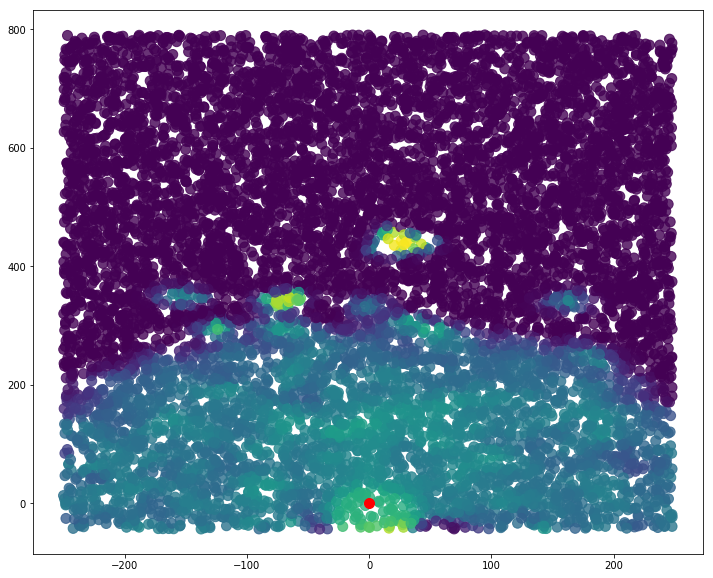

In [92]:
vect_train = df_to_array(df[["loc_x", "loc_y"]])   
clf.fit(vect_train, df["shot_made_flag"])
clf.show(vect_train)

In [ ]:
vect_train = df_to_array(new_df[["loc_x", "loc_y", "action_type", "previous_win_frequency"]])   
vect_train = rescale(vect_train, (0,1))

scores = cross_val_score(clf, vect_train, new_df["shot_made_flag"], scoring="neg_log_loss")
print(scores)
print(- np.mean(scores), np.std(scores))

# Pipelining

In [223]:
from sklearn.pipeline import Pipeline

In [ ]:
clf = SVC()
transformator = PersoClassifierPipeline()
print(transformator)
transformator_clf = Pipeline([('trans', transformator), ("classifier", clf)])
transformator_clf.fit(vect_train, new_df["shot_made_flag"].values)